In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

In [3]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2019, 12, 31)
df = yf.download('AAPL', start, end)
df = df.reset_index()
# To Show Index from 0 
df = df.drop(['Date','Adj Close'], axis=1)
# It will drop Date and Adj Close column from Data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,27.561969,27.806542,27.312041,27.568102,2.996722e+08
std,13.996451,14.118351,13.894065,14.016253,2.352933e+08
min,6.870357,7.000000,6.794643,6.858929,4.544800e+07
25%,16.242322,16.345000,16.047500,16.178214,1.247618e+08
50%,24.770000,25.055000,24.592501,24.860001,2.220316e+08
75%,37.532501,37.956251,37.273750,37.611250,4.068050e+08
max,72.779999,73.492500,72.029999,72.879997,1.880998e+09


In [5]:
df.tail()

,Open,High,Low,Close,Volume
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000
2514,72.364998,73.172501,71.305000,72.879997,144114400


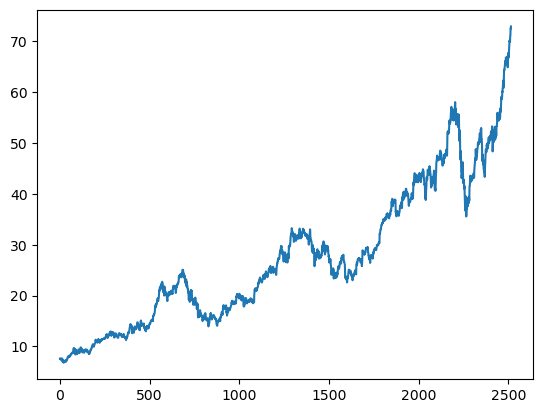

In [6]:
plt.plot(df.Close)
# Just for ploting Graph according to close column

In [7]:
avg100= df.Close.rolling(100).mean()
# It will start calculating mean of previous 100 entries
avg200= df.Close.rolling(200).mean()

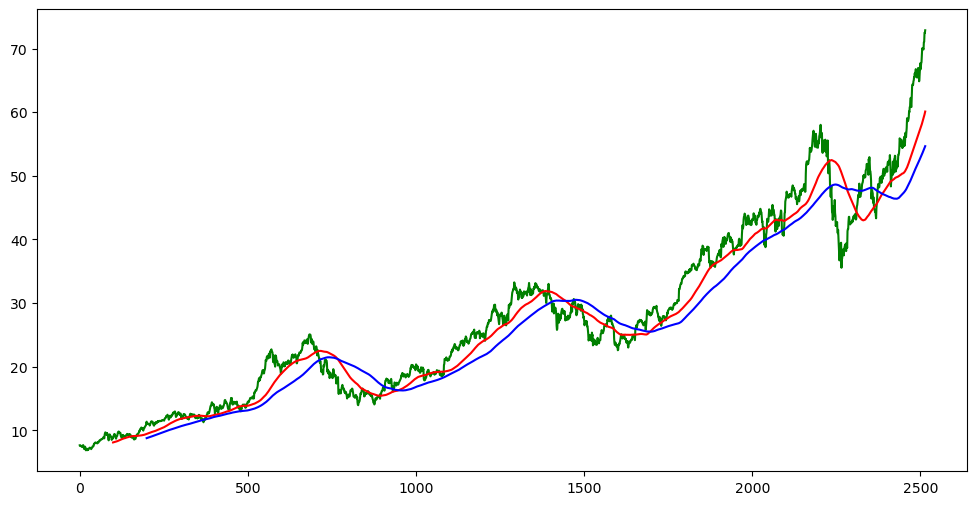

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close,'g')
plt.plot(avg100,'r')
plt.plot(avg200,'b')


In [9]:
data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
# Seprating 70% data for Training
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
# Seprating 30% data for Training
print(data_training.shape)
# For telling data in no of rows and columns
print(data_testing.shape)



(1760, 1)
(755, 1)


In [10]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [11]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
data_training_array= scaler.fit_transform(data_training)
# To classified data between 0 and 1 the lowest will get 0 and the highest will get 1
print(data_training_array)

[[0.02971782]
 [0.03021854]
 [0.02560389]
 ...
 [0.84388656]
 [0.85089656]
 [0.84616011]]


In [13]:
data_training_array.shape

(1760, 1)

In [14]:
x_train=[]
y_train=[]
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    # distribute data into slice of 100 like first it store data form 0-99
    y_train.append(data_training_array[i,0])
    # it will store the result of 0-99 which is on 100 index
# print ("kldsajf",x_train[1])
# print("end")
# print("malik b",y_train[1])
x_train=np.array(x_train)
y_train=np.array(y_train)
# Just to convert these into arrays


In [15]:
# Machine Learning Model
!pip install keras

In [16]:
!pip install tensorflow

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from keras.layers import LSTM
from keras.models import Model

In [18]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

D:\Python Project\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 34s 284ms/step - loss: 0.1262
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 257ms/step - loss: 0.0140
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 309ms/step - loss: 0.0097
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 294ms/step - loss: 0.0088
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 269ms/step - loss: 0.0080
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 279ms/step - loss: 0.0097
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 326ms/step - loss: 0.0078
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 299ms/step - loss: 0.0082
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 325ms/step - loss: 0.0071
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 269ms/step - loss: 0.0060
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 285ms/step - loss: 0.0064
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 318ms/step - loss: 0.0061
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 321ms/step - loss: 0.0065
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 304ms/step - loss: 0.0061
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 

In [21]:
model.save('keras_model.h5')

In [22]:
data_testing.head()
# for predicting this 1760th index value I need previous 100 days data which is in my traing data

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [23]:
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [24]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [25]:

input_data=scaler.fit_transform(final_df)
# scale it btw 0 to 1
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [26]:
input_data.shape

(855, 1)

In [27]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [28]:
x_test=np.array(x_test)
y_test=np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [29]:
# Making Predictions
y_predicted=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step


In [30]:
y_predicted.shape

(755, 1)

In [31]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [32]:
y_predicted

array([[0.13939023],
       [0.14035532],
       [0.14127882],
       [0.1421262 ],
       [0.14286888],
       [0.14348826],
       [0.14398405],
       [0.14437631],
       [0.14469692],
       [0.14498267],
       [0.1452675 ],
       [0.14557478],
       [0.1459225 ],
       [0.14632434],
       [0.14678496],
       [0.14730161],
       [0.1478666 ],
       [0.14846751],
       [0.14909884],
       [0.14976293],
       [0.15046144],
       [0.15119171],
       [0.15194392],
       [0.15274839],
       [0.15366587],
       [0.15475556],
       [0.1560728 ],
       [0.15766644],
       [0.15957178],
       [0.16180481],
       [0.164357  ],
       [0.16720152],
       [0.17027366],
       [0.17355528],
       [0.17701744],
       [0.18062378],
       [0.18433388],
       [0.18810308],
       [0.19188009],
       [0.19561003],
       [0.19922711],
       [0.20267695],
       [0.205939  ],
       [0.20899844],
       [0.21184771],
       [0.21448296],
       [0.21690387],
       [0.219

In [33]:
# to check if y predicted and y test are same
scaler.scale_
# for check how much they are scaled

array([0.02123255])

In [34]:
scale_factor=1/0.02123255
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

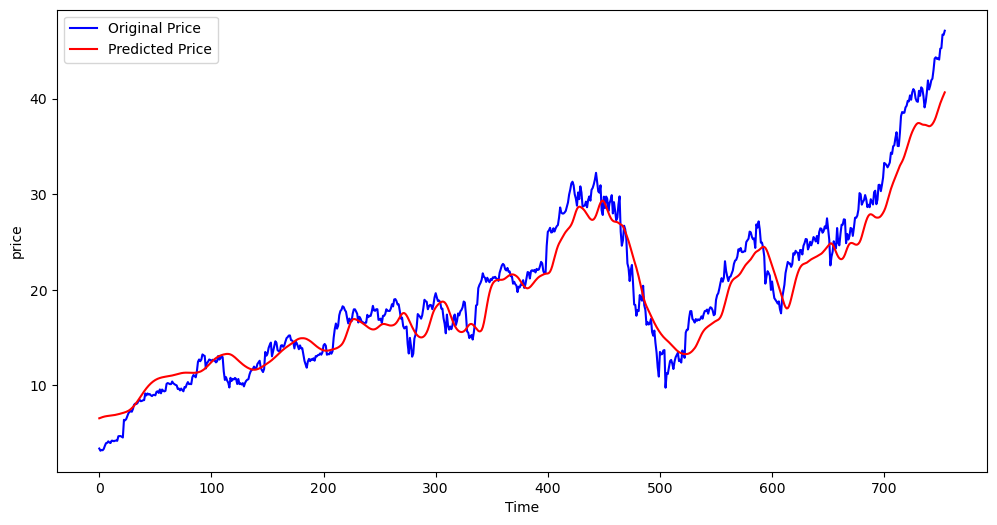

In [35]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()


In [36]:
# Precdicted and testing values are matching

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
scale_factor=1/0.02123255
y_predicted=y_predicted/scale_factor
y_test=y_test/scale_factor
y_predicted=np.array(y_predicted)
y_test=np.array(y_test)
type(y_predicted)
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
conf_matrix = confusion_matrix(y_test, y_predicted)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n{conf_matrix}")

ValueError: continuous is not supported

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
y_predicted=np.array(y_predicted)
y_test=np.array(y_test)
type(y_predicted)


numpy.ndarray